In [15]:
#Need to import libraries we will be using
import numpy as np
import pandas as pd

# Section 3 - Ingesting Data

In [16]:
#Read fhv data from csv file

df = pd.read_csv('fhv_tripdata.csv') #Reading file and saving in dataframe
df #printing dataframe

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num
0,12/27/2018 11:34,12/27/2018 11:50,NaN,NaN,NaN,B03035,NaN
1,12/27/2018 11:35,12/27/2018 11:40,NaN,NaN,NaN,B03035,NaN
2,12/27/2018 11:35,12/27/2018 12:00,NaN,NaN,NaN,B03035,NaN
3,12/2/2018 8:42,12/2/2018 8:49,NaN,NaN,NaN,B00054,NaN
4,12/27/2018 11:35,12/27/2018 11:55,NaN,NaN,NaN,B03035,NaN
...,...,...,...,...,...,...,...
4013,12/9/2018 11:06,12/9/2018 11:32,125.0,138.0,NaN,B02617,NaN
4014,12/9/2018 12:25,12/9/2018 13:03,138.0,161.0,NaN,B02617,NaN
4015,12/9/2018 13:10,12/9/2018 13:19,43.0,48.0,NaN,B02617,NaN
4016,12/9/2018 13:28,12/9/2018 13:54,230.0,211.0,NaN,B02617,NaN


### Exploring data

In [17]:
#Printing information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pickup_DateTime          4018 non-null   object 
 1   DropOff_datetime         4018 non-null   object 
 2   PUlocationID             3687 non-null   float64
 3   DOlocationID             3710 non-null   float64
 4   SR_Flag                  1105 non-null   float64
 5   Dispatching_base_number  4018 non-null   object 
 6   Dispatching_base_num     0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 219.9+ KB


### Data Quality Check

In [18]:
# Finding number of unique values in a column

len(  #Find lenght of the object 
    pd.unique(  #Look for unique values only
    df['Dispatching_base_number'])  #Passing dataframe & column name
   )

10

In [19]:
#Can find outlier values
#Shows values for columns with numeric values only
df.describe()

,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_num
count,3687.000000,3710.000000,1105.0,0.0
mean,137.284242,142.239892,1.0,NaN
std,77.133619,79.139414,0.0,NaN
min,3.000000,1.000000,1.0,NaN
25%,69.000000,74.000000,1.0,NaN
50%,138.000000,141.500000,1.0,NaN
75%,213.000000,223.000000,1.0,NaN
max,263.000000,265.000000,1.0,NaN


# Section 4 - Cleanse Data

In [20]:
#Creating a new dataframe with cleansed data
dfc = df

### Correct Columns

In [21]:
#Convert column types to dates

#Using pandas converting a column to datatime type, and 
#assigning back to the specific column in the dataframe
dfc['DropOff_datetime'] = pd.to_datetime(
                                df['DropOff_datetime'])

dfc['Pickup_DateTime'] = pd.to_datetime(df['Pickup_DateTime'])

#Printing results to see column type change
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pickup_DateTime          4018 non-null   datetime64[ns]
 1   DropOff_datetime         4018 non-null   datetime64[ns]
 2   PUlocationID             3687 non-null   float64       
 3   DOlocationID             3710 non-null   float64       
 4   SR_Flag                  1105 non-null   float64       
 5   Dispatching_base_number  4018 non-null   object        
 6   Dispatching_base_num     0 non-null      float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 219.9+ KB


In [22]:
#Drop dispatching base number column since it has no data

dfc = dfc.drop(columns=['Dispatching_base_num']) #Pass the column to drop

#Printing results to see column type change
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pickup_DateTime          4018 non-null   datetime64[ns]
 1   DropOff_datetime         4018 non-null   datetime64[ns]
 2   PUlocationID             3687 non-null   float64       
 3   DOlocationID             3710 non-null   float64       
 4   SR_Flag                  1105 non-null   float64       
 5   Dispatching_base_number  4018 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 188.5+ KB


In [23]:
#Rename columns to more meaningful names
dfc.rename(columns = 
           {'Pickup_DateTime': 'PickupTime',
            'DropOff_datetime': 'DropTime',
            'PUlocationID': 'PickupLocationID',
            'DOlocationID': 'DropLocationID',
            'Dispatching_base_number': 'BaseLicenseNumber'
           }
           , inplace = True)

#Printing results to see column type change
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PickupTime         4018 non-null   datetime64[ns]
 1   DropTime           4018 non-null   datetime64[ns]
 2   PickupLocationID   3687 non-null   float64       
 3   DropLocationID     3710 non-null   float64       
 4   SR_Flag            1105 non-null   float64       
 5   BaseLicenseNumber  4018 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 188.5+ KB


### Data Quality checks

In [24]:
#Find out if we have some columns without any value
dfc.isnull().sum()

PickupTime              0
DropTime                0
PickupLocationID      331
DropLocationID        308
SR_Flag              2913
BaseLicenseNumber       0
dtype: int64

In [25]:
# SR_Flag has values 1 or none,
# therefore change all null values to 0

dfc['SR_Flag'] = dfc['SR_Flag'].fillna(0)

In [26]:
# Drop all rows where any value is null
# Essentially where PickupLocation or DropLocation are not available

dfc = dfc.dropna()

In [27]:
#All records with null values have been removed
dfc.isnull().sum()

PickupTime           0
DropTime             0
PickupLocationID     0
DropLocationID       0
SR_Flag              0
BaseLicenseNumber    0
dtype: int64

In [28]:
#All columns are in proper format, with meaningful names
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684 entries, 55 to 4017
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PickupTime         3684 non-null   datetime64[ns]
 1   DropTime           3684 non-null   datetime64[ns]
 2   PickupLocationID   3684 non-null   float64       
 3   DropLocationID     3684 non-null   float64       
 4   SR_Flag            3684 non-null   float64       
 5   BaseLicenseNumber  3684 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 201.5+ KB


# Section 5 - Curating data

### Ingest FHV Base data 

In [29]:
#Read Fhv base details

#File is in json format, not csv
dfj = pd.read_json('FhvBases.json')
dfj

,License Number,Entity Name,Telephone Number,SHL Endorsed,Address,GeoLocation,Type of Base,Date,Time
0,B02865,"VIER-NY,LLC",6.466658e+09,No,"{'Building': '636', 'Street': 'WEST 28 STREE...","{'Latitude': 40.75273, 'Longitude': -74.006408...",BLACK CAR BASE,2019-08-15,18:03:31
1,B02634,VETERANS RADIO DISPATCHER CORP.,7.183648e+09,No,"{'Building': '131', 'Street': 'KINGSBRIDGE ROA...","{'Latitude': 40.86927, 'Longitude': -73.90281,...",LIVERY BASE,2019-08-15,18:03:31
2,B80094,ALPHA VAN LINE,5.162851e+09,No,"{'Building': '115-54', 'Street': '238 STREET',...","{'Latitude': 40.693473, 'Longitude': -73.72444...",COMMUTER VAN AUTHORITY BASE,2019-08-15,18:03:31
3,B02677,"A.T.B. CAR AND LIMOUSINE SERVICE, INC.",7.184854e+09,No,"{'Building': '866', 'Street': 'NEW LOTS AVENUE...","{'Latitude': 40.667838, 'Longitude': -73.8788,...",LIVERY BASE,2019-08-15,18:03:31
4,B02152,"KYOEI LIMOUSINE, INC.",7.183263e+09,No,"{'Building': '57-48', 'Street': 'MASPETH AVENU...","{'Latitude': 40.722961, 'Longitude': -73.91031...",LUXURY/LIMOUSINE,2019-08-15,18:03:31
...,...,...,...,...,...,...,...,...,...
775,B90701,CATHAY EXPRESS TRANSPORTATION INC,2.123373e+09,Yes,"{'Building': '98-51', 'Street': 'QUEENS BOULEV...","{'Latitude': 40.728061, 'Longitude': -73.85607...",PARATRANSIT BASE,2019-08-15,18:03:31
776,B00056,TRANSIT PRIVATE CAR SERVICE INC.,7.186494e+09,No,"{'Building': '1417', 'Street': 'ROCKAWAY PARKW...","{'Latitude': 40.645455, 'Longitude': -73.90266...",LIVERY BASE,2019-08-15,18:03:31
777,B90469,MERCY CARE TRANSPORTATION INC.,7.182663e+09,No,"{'Building': '2699', 'Street': 'RICHMOND TERRA...","{'Latitude': 40.637594, 'Longitude': -74.15048...",PARATRANSIT BASE,2019-08-15,18:03:31
778,B01721,W.K. CAR & LIMO SERVICE INC,2.122741e+09,No,"{'Building': '108', 'Street': 'MADISON STREET'...","{'Latitude': 40.712007, 'Longitude': -73.99515...",LIVERY BASE,2019-08-15,18:03:31


### change column names

In [30]:
#Rename columns to more meaningful names
dfj.rename(columns = 
           {'License Number': 'BaseLicenseNumber',
            'Type of Base': 'BaseType',
            'Entity Name': 'EntityName',
            'Telephone Number': 'TelephoneNumber'
           }
           , inplace = True)

In [31]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BaseLicenseNumber  780 non-null    object        
 1   EntityName         780 non-null    object        
 2   TelephoneNumber    779 non-null    float64       
 3   SHL Endorsed       780 non-null    object        
 4   Address            780 non-null    object        
 5   GeoLocation        780 non-null    object        
 6   BaseType           780 non-null    object        
 7   Date               780 non-null    datetime64[ns]
 8   Time               780 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 55.0+ KB


### Flatten nested values

In [32]:
# Method to extract nested values into separate columns

dfj.Address.apply(pd.Series)

,Building,Street,City,State,Postcode
0,636,WEST 28 STREET,NEW YORK,NY,10001
1,131,KINGSBRIDGE ROAD,BRONX,NY,10468
2,115-54,238 STREET,ELMONT,NY,11003
3,866,NEW LOTS AVENUE,BROOKLYN,NY,11208
4,57-48,MASPETH AVENUE,MASPETH,NY,11378
...,...,...,...,...,...
775,98-51,QUEENS BOULEVARD 2G,REGO PARK,NY,11374
776,1417,ROCKAWAY PARKWAY,BROOKLYN,NY,11236
777,2699,RICHMOND TERRACE,STATEN ISLAND,NY,10303
778,108,MADISON STREET,NEW YORK,NY,10002


In [33]:
# Extract 'fields' from Address column, and saving them as 
# new separate columns

dfj = pd.concat( #Concatinate columns into dfj daataframe
                [ dfj.drop('Address', axis=1), #drop complex column
                  dfj.Address.apply(pd.Series) #Extract values as separate columns
                ], axis=1)

In [34]:
#Displaying new columns added
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BaseLicenseNumber  780 non-null    object        
 1   EntityName         780 non-null    object        
 2   TelephoneNumber    779 non-null    float64       
 3   SHL Endorsed       780 non-null    object        
 4   GeoLocation        780 non-null    object        
 5   BaseType           780 non-null    object        
 6   Date               780 non-null    datetime64[ns]
 7   Time               780 non-null    object        
 8   Building           780 non-null    object        
 9   Street             780 non-null    object        
 10  City               780 non-null    object        
 11  State              780 non-null    object        
 12  Postcode           780 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usa

In [35]:
# Extract 'fields' from GeoLocation column also

dfj = pd.concat([dfj.drop('GeoLocation', axis=1),dfj.GeoLocation.apply(pd.Series)], axis=1)

In [36]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BaseLicenseNumber  780 non-null    object        
 1   EntityName         780 non-null    object        
 2   TelephoneNumber    779 non-null    float64       
 3   SHL Endorsed       780 non-null    object        
 4   BaseType           780 non-null    object        
 5   Date               780 non-null    datetime64[ns]
 6   Time               780 non-null    object        
 7   Building           780 non-null    object        
 8   Street             780 non-null    object        
 9   City               780 non-null    object        
 10  State              780 non-null    object        
 11  Postcode           780 non-null    int64         
 12  Latitude           780 non-null    float64       
 13  Longitude          780 non-null    float64       
 14  Location  

In [37]:
dfj.head(10)

,BaseLicenseNumber,EntityName,TelephoneNumber,SHL Endorsed,BaseType,Date,Time,Building,Street,City,State,Postcode,Latitude,Longitude,Location
0,B02865,"VIER-NY,LLC",6.466658e+09,No,BLACK CAR BASE,2019-08-15,18:03:31,636,WEST 28 STREET,NEW YORK,NY,10001,40.752730,-74.006408,"(40.75273, -74.006408)"
1,B02634,VETERANS RADIO DISPATCHER CORP.,7.183648e+09,No,LIVERY BASE,2019-08-15,18:03:31,131,KINGSBRIDGE ROAD,BRONX,NY,10468,40.869270,-73.902810,"(40.86927, -73.90281)"
2,B80094,ALPHA VAN LINE,5.162851e+09,No,COMMUTER VAN AUTHORITY BASE,2019-08-15,18:03:31,115-54,238 STREET,ELMONT,NY,11003,40.693473,-73.724446,"(40.693473, -73.724446)"
3,B02677,"A.T.B. CAR AND LIMOUSINE SERVICE, INC.",7.184854e+09,No,LIVERY BASE,2019-08-15,18:03:31,866,NEW LOTS AVENUE,BROOKLYN,NY,11208,40.667838,-73.878800,"(40.667838, -73.8788)"
4,B02152,"KYOEI LIMOUSINE, INC.",7.183263e+09,No,LUXURY/LIMOUSINE,2019-08-15,18:03:31,57-48,MASPETH AVENUE,MASPETH,NY,11378,40.722961,-73.910310,"(40.722961, -73.91031)"
5,B02844,"ENDOR CAR & DRIVER,LLC.",4.154758e+09,No,BLACK CAR BASE,2019-08-15,18:03:31,31-00,47 AVENUE SUITE # 4123A,LIC,NY,11101,40.742082,-73.935520,"(40.742082, -73.93552)"
6,B02841,"SKYWAY EXECUTIVE SERVICE, INC",7.183596e+09,No,BLACK CAR BASE,2019-08-15,18:03:31,68-20A,FRESH MEADOW LANE,FRESH MEADOWS,NY,11365,40.733337,-73.794706,"(40.733337, -73.794706)"
7,B00472,FARRELL'S LEASING CO.,2.128616e+09,No,LUXURY/LIMOUSINE,2019-08-15,18:03:31,22-11,38 AVENUE,LIC,NY,11101,40.757077,-73.937504,"(40.757077, -73.937504)"
8,B01739,CITY CAR SERVICE CORP,7.184182e+09,No,LIVERY BASE,2019-08-15,18:03:31,429,SUTTER AVENUE,BROOKLYN,NY,11212,40.668473,-73.903383,"(40.668473, -73.903383)"
9,B00248,YELLOWSTONE TRANSPORTATION INC.,7.185398e+09,No,LIVERY BASE,2019-08-15,18:03:31,41-31,MAIN STREET,FLUSHING,NY,11355,40.758114,-73.829620,"(40.758114, -73.82962)"


In [38]:
# Drop unwanted columns
dfj = dfj.drop(['Location','Time','Date'], axis=1)

In [39]:
dfj.info()
#dfj.to_csv('fhvBaseData.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BaseLicenseNumber  780 non-null    object 
 1   EntityName         780 non-null    object 
 2   TelephoneNumber    779 non-null    float64
 3   SHL Endorsed       780 non-null    object 
 4   BaseType           780 non-null    object 
 5   Building           780 non-null    object 
 6   Street             780 non-null    object 
 7   City               780 non-null    object 
 8   State              780 non-null    object 
 9   Postcode           780 non-null    int64  
 10  Latitude           780 non-null    float64
 11  Longitude          780 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 73.2+ KB


# Section 6 - Modelling

### Create derived columns

In [40]:
dfc.head(5)

,PickupTime,DropTime,PickupLocationID,DropLocationID,SR_Flag,BaseLicenseNumber
55,2018-12-22 05:00:00,2018-12-22 09:13:00,208.0,248.0,0.0,B02395
58,2018-12-19 06:30:00,2018-12-19 10:50:00,208.0,248.0,0.0,B02395
59,2018-12-20 06:30:00,2018-12-20 10:52:00,208.0,248.0,0.0,B02395
61,2018-12-21 05:00:00,2018-12-21 09:35:00,208.0,248.0,0.0,B02395
63,2018-12-29 05:00:00,2018-12-29 09:36:00,208.0,248.0,0.0,B02395


In [41]:
# Create trip time column by subtracting 
# pickup time from drop off time 

#
dff = dfc.assign( #Creating a new column
    TripTime = dfc['DropTime'] - dfc['PickupTime']) 

In [42]:
dff.head(5)

,PickupTime,DropTime,PickupLocationID,DropLocationID,SR_Flag,BaseLicenseNumber,TripTime
55,2018-12-22 05:00:00,2018-12-22 09:13:00,208.0,248.0,0.0,B02395,0 days 04:13:00
58,2018-12-19 06:30:00,2018-12-19 10:50:00,208.0,248.0,0.0,B02395,0 days 04:20:00
59,2018-12-20 06:30:00,2018-12-20 10:52:00,208.0,248.0,0.0,B02395,0 days 04:22:00
61,2018-12-21 05:00:00,2018-12-21 09:35:00,208.0,248.0,0.0,B02395,0 days 04:35:00
63,2018-12-29 05:00:00,2018-12-29 09:36:00,208.0,248.0,0.0,B02395,0 days 04:36:00


In [43]:
#Convert from TimeDate to seconds
dff['TripTime'] = dff['TripTime'].dt.seconds.astype('int16')

#Convert seconds to minutes
dff['TripTime'] = dff['TripTime']//60

dff.head(5)

,PickupTime,DropTime,PickupLocationID,DropLocationID,SR_Flag,BaseLicenseNumber,TripTime
55,2018-12-22 05:00:00,2018-12-22 09:13:00,208.0,248.0,0.0,B02395,253
58,2018-12-19 06:30:00,2018-12-19 10:50:00,208.0,248.0,0.0,B02395,260
59,2018-12-20 06:30:00,2018-12-20 10:52:00,208.0,248.0,0.0,B02395,262
61,2018-12-21 05:00:00,2018-12-21 09:35:00,208.0,248.0,0.0,B02395,275
63,2018-12-29 05:00:00,2018-12-29 09:36:00,208.0,248.0,0.0,B02395,276


## Data Quality Check

In [44]:
#Rides longer than 2 hours

dff[ #Select rows to show
    dff['TripTime'] > 120 #Rows with Trip time more than 120
    ]

,PickupTime,DropTime,PickupLocationID,DropLocationID,SR_Flag,BaseLicenseNumber,TripTime
55,2018-12-22 05:00:00,2018-12-22 09:13:00,208.0,248.0,0.0,B02395,253
58,2018-12-19 06:30:00,2018-12-19 10:50:00,208.0,248.0,0.0,B02395,260
59,2018-12-20 06:30:00,2018-12-20 10:52:00,208.0,248.0,0.0,B02395,262
61,2018-12-21 05:00:00,2018-12-21 09:35:00,208.0,248.0,0.0,B02395,275
63,2018-12-29 05:00:00,2018-12-29 09:36:00,208.0,248.0,0.0,B02395,276
68,2018-12-05 18:15:00,2018-12-05 22:51:00,208.0,248.0,0.0,B02395,276
69,2018-12-14 06:30:00,2018-12-14 11:11:00,208.0,248.0,0.0,B02395,281
70,2018-12-27 05:00:00,2018-12-27 10:09:00,208.0,248.0,0.0,B02395,309


In [45]:
#Check how many records exist before dropping values
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684 entries, 55 to 4017
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PickupTime         3684 non-null   datetime64[ns]
 1   DropTime           3684 non-null   datetime64[ns]
 2   PickupLocationID   3684 non-null   float64       
 3   DropLocationID     3684 non-null   float64       
 4   SR_Flag            3684 non-null   float64       
 5   BaseLicenseNumber  3684 non-null   object        
 6   TripTime           3684 non-null   int16         
dtypes: datetime64[ns](2), float64(3), int16(1), object(1)
memory usage: 208.7+ KB


In [46]:
rows = dff[ dff['TripTime'] > 120].index

dff.drop(rows, inplace=True)

In [47]:
#Check no. of records after dropping values
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 78 to 4017
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PickupTime         3676 non-null   datetime64[ns]
 1   DropTime           3676 non-null   datetime64[ns]
 2   PickupLocationID   3676 non-null   float64       
 3   DropLocationID     3676 non-null   float64       
 4   SR_Flag            3676 non-null   float64       
 5   BaseLicenseNumber  3676 non-null   object        
 6   TripTime           3676 non-null   int16         
dtypes: datetime64[ns](2), float64(3), int16(1), object(1)
memory usage: 208.2+ KB


### Join base data & fhv taxi data

In [48]:
# Join FHV data and FHV_base data in one dataframe

# Creating a new dataframe by joining dfc & dfj
dfm = dff.join(
    dfj.set_index('BaseLicenseNumber'), on='BaseLicenseNumber') #Column to be used as 'key'

In [49]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 78 to 4017
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PickupTime         3676 non-null   datetime64[ns]
 1   DropTime           3676 non-null   datetime64[ns]
 2   PickupLocationID   3676 non-null   float64       
 3   DropLocationID     3676 non-null   float64       
 4   SR_Flag            3676 non-null   float64       
 5   BaseLicenseNumber  3676 non-null   object        
 6   TripTime           3676 non-null   int16         
 7   EntityName         3676 non-null   object        
 8   TelephoneNumber    3676 non-null   float64       
 9   SHL Endorsed       3676 non-null   object        
 10  BaseType           3676 non-null   object        
 11  Building           3676 non-null   object        
 12  Street             3676 non-null   object        
 13  City               3676 non-null   object        
 14  State  

## Data Quality Check

In [50]:
#Count number of unique number of pickup location IDs

len( pd.unique(
    dfm['PickupLocationID']) 
   )

239

In [51]:
#Count number of unique values of  drop off location IDs

len( pd.unique(dfm['DropLocationID']) )

242

# Generate Reports

In [52]:
import matplotlib.pyplot as plt #Library to plot values

#Setting the plot size
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [53]:
#Generate report to show pick up locations with longest strips

# Grop records by pickup location
# Display column with sum of trips from pick up location
# Sort records
dfm.groupby('PickupLocationID').TripTime.agg(['sum']).sort_values(by='sum', ascending=False) 

,sum
PickupLocationID,
132.0,1364
244.0,1324
48.0,1209
61.0,1151
235.0,1108
...,...
122.0,10
93.0,10
111.0,8


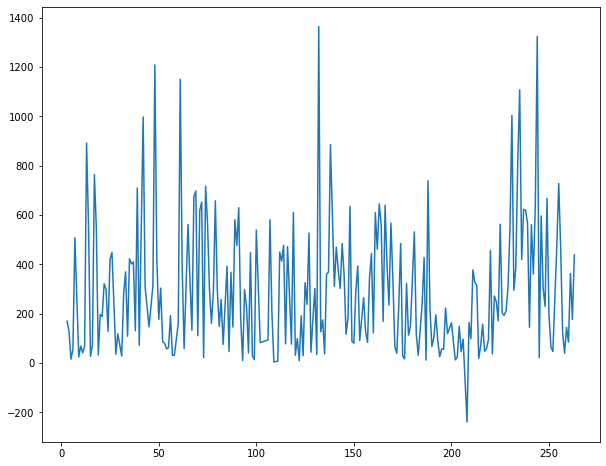

In [54]:
#Generate report to show pick up locations with MOST trips

# Grop records by pickup location
# Display column withnumber of trips from the pick up location
# Sort records
plt.plot( dfm.groupby('PickupLocationID').TripTime.agg(['sum']) )
plt.show()

### Data Quality check

In [55]:
rows = dfm[ dfm['TripTime'] < 0].index

dfm.drop(rows, inplace=True)

In [56]:
#Generate report to show pick up locations with MOST trips

# Grop records by pickup location
# Display column withnumber of trips from the pick up location
# Sort records
dfm.groupby('PickupLocationID').TripTime.agg(['count']).sort_values(by='count', ascending=False) 

,count
PickupLocationID,
235.0,67
244.0,65
61.0,58
42.0,55
231.0,50
...,...
187.0,1
111.0,1
109.0,1


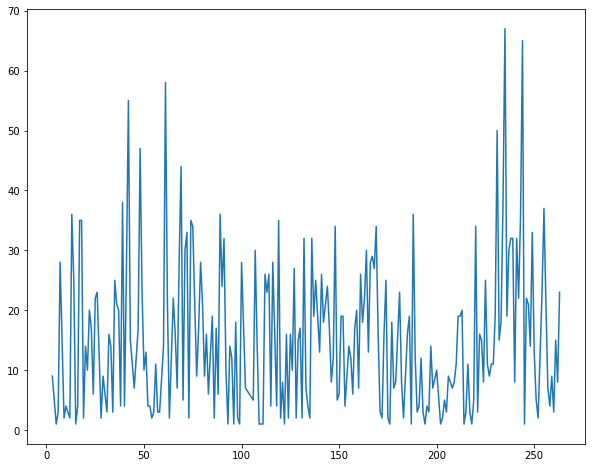

In [57]:
#Generate report to show pick up locations with MOST trips

# Grop records by pickup location
# Display column withnumber of trips from the pick up location
# Sort records
plt.plot( dfm.groupby('PickupLocationID').TripTime.agg(['count']) )
plt.show()

In [58]:
#Can extract the values
dfm.to_csv('finalModel.csv')